In [ ]:
#Objective:
#The objective of this assignment is to implement PCA on a given dataset and analyse the results.

### Load the dataset into a Pandas dataframe.

In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Split the dataset into features and target variables.

In [11]:
from sklearn.model_selection import train_test_split

X=df.drop('quality',axis=1)
y=df['quality']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=40)


### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [12]:
from sklearn.preprocessing import StandardScaler

std_scalar=StandardScaler()

X_train=std_scalar.fit_transform(X_train)
X_test=std_scalar.transform(X_test)

### Implement PCA on the preprocessed dataset using the scikit-learn library.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

### Determine the optimal number of principal components to retain based on the explained variance ratio.

In [15]:
pca.explained_variance_ratio_

array([0.283502  , 0.17194388, 0.13937574, 0.10771469, 0.08979962,
       0.06179019, 0.05256902, 0.03916444, 0.0321325 , 0.01649383])

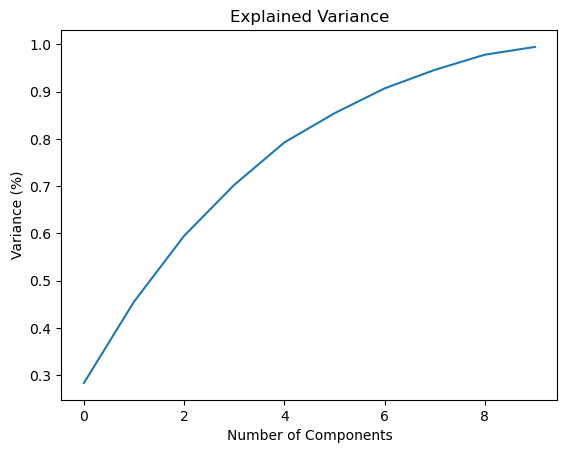

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

### Visualise the results of PCA using a scatter plot.

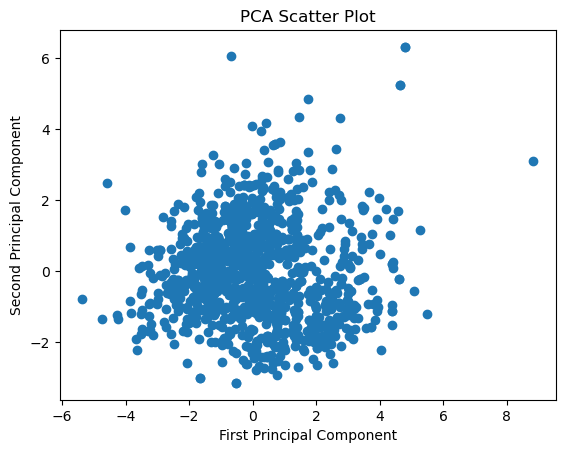

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

#### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [24]:
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings('ignore')

kmeans = KMeans(n_clusters=3)
X_train_pca_kmeans = kmeans.fit_transform(X_pca)
X_train_pca_kmeans

array([[4.45240837, 5.82438138, 5.34609531],
       [2.63189715, 4.75753414, 2.47790894],
       [2.92268582, 1.59121883, 2.50938378],
       ...,
       [1.59032589, 4.37688342, 3.73044348],
       [3.91210413, 4.42795525, 1.87896702],
       [2.61221984, 3.37375383, 1.35973323]])

### Interpret the results of PCA and clustering analysis.

PCA helps to reduce the dimensionality of the dataset by transforming it into a lower-dimensional space while retaining most of its variance. The optimal number of principal components to retain can be determined based on the explained variance ratio plot. In this case, we can see that the first two principal components explain most of the variance in the dataset.

Clustering analysis helps to group similar data points together based on their features. In this case, K-Means clustering algorithm was used to cluster the PCA-transformed data into three clusters. We can visualize the results of clustering using a scatter plot where each data point is colored according to its cluster assignment.

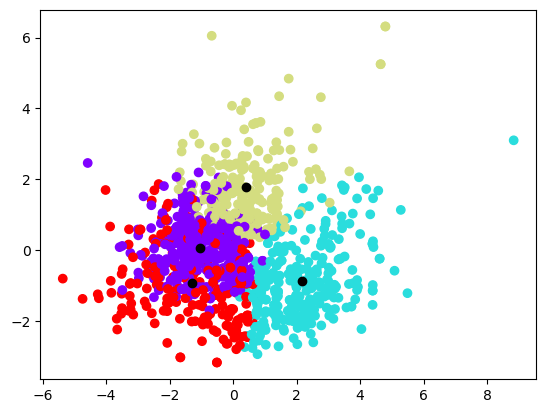

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()